# LHC Page1
<hr style="border-top-width: 4px; border-top-color: #34609b;">
Extract live data from the [LHC](http://home.cern/topics/large-hadron-collider) and create interactive plots with [pytimber](https://github.com/rdemaria/pytimber).


## Preparation

Let's import all the Python modules necessary for this study and tell matplotlib to generate interactive javascript plots.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import time
import pytimber

We now open the connection to the database:

In [2]:
db = pytimber.LoggingDB()

## Retrieve the data from the logging database
We are now ready to open a connection to the logging database with [pytimber](https://github.com/rdemaria/pytimber) and extract for the past 24 hours:
- The beams' intensities
- The beam energy

In [3]:
now=time.time()
now_minus_a_day = now - 3600*24
ib1="LHC.BCTDC.A6R4.B1:BEAM_INTENSITY"
ib2="LHC.BCTDC.A6R4.B2:BEAM_INTENSITY"
nrg="LHC.BOFSU:OFSU_ENERGY"
data=db.get([ib1,ib2,nrg],now_minus_a_day,now)

## Plotting the data
We can now build a plot of the intensity and beams energy starting from the data we retrieved. The [matplotlib](https://matplotlib.org) library can be used for creating interactive javascript based data visualisations.

<IPython.core.display.Javascript object>


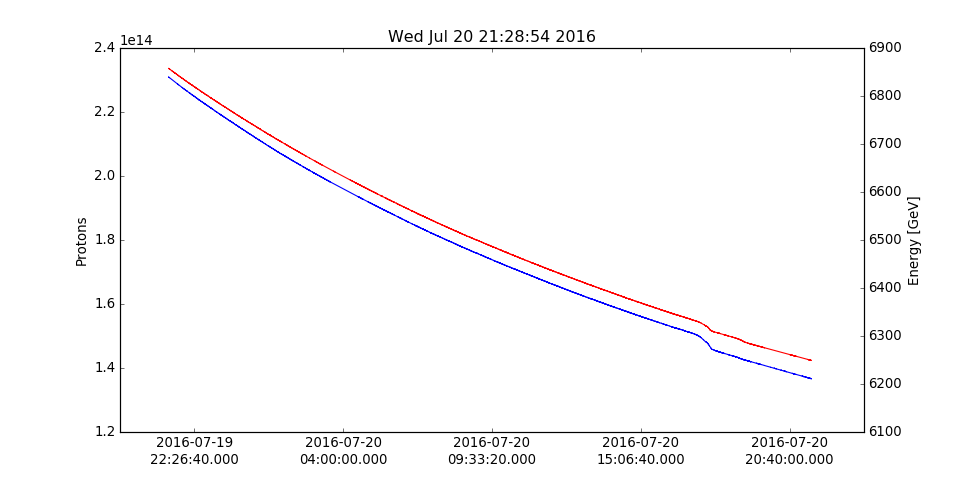

In [4]:
plt.figure(figsize=(12,6))

tt,vv=data[ib1]
plt.plot(tt,vv,'-b',label='Beam1')
tt,vv=data[ib2]
plt.plot(tt,vv,'-r',label='Beam2')
plt.ylabel('Protons')
plt.twinx()
tt,vv=data[nrg]
plt.plot(tt,vv,'-g',label='Energy')
plt.ylabel('Energy [GeV]')
plt.title(time.asctime(time.localtime(now)))
pytimber.set_xaxis_date()

## Further analysis
In this section we show how to search for the available variables such as the luminosity of experiments and the tree of the variables.

In [5]:
print "Experiments' instantaneous luminosity variable names"
db.search("%LUMI_INST")

Experiments' instantaneous luminosity variable names


[u'ALICE:BUNCH_LUMI_INST',
 u'ATLAS:BUNCH_LUMI_INST',
 u'CMS:BUNCH_LUMI_INST',
 u'LHCB:BUNCH_LUMI_INST']

In [6]:
print "Exploration of the variables' tree"
db.tree.LHC.Beam_Instrumentation.Beam_Position.DOROS_BPMs.IP1.LHC_BPM_1L1_B1_DOROS_ACQUISITION_STATUS

Exploration of the variables' tree


u'LHC.BPM.1L1.B1.DOROS:ACQUISITION_STATUS'